Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/05/26


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy

from time import time
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

%matplotlib inline

sb.set_style('darkgrid')
my_dpi = 96

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Cluster Models Examination



### 1 - Five Clusters Farly Close to each other :


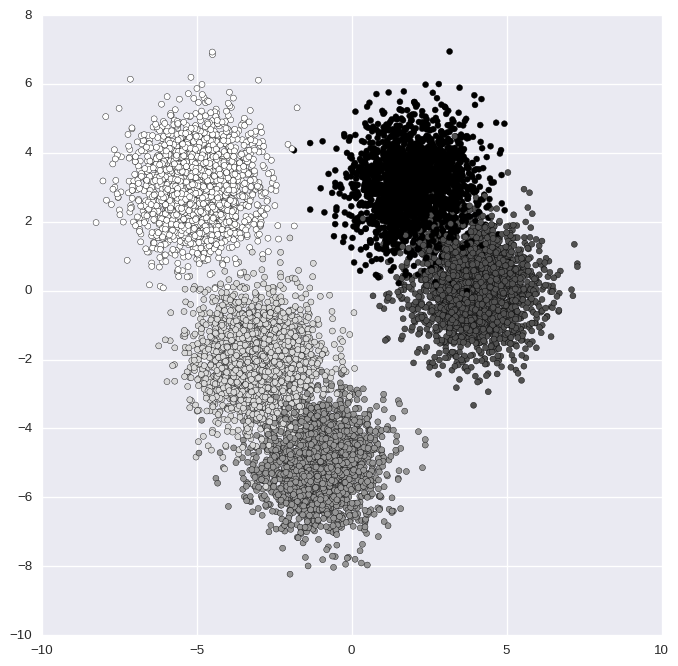

In [2]:
# The coordinates of the centers of our blobs.
centers = [[-5, 3], [-3, -2], [-1, -5], [4, 0], [2, 3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=4,
    random_state=42)

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
"""
Example function with types documented in the docstring.

`PEP 484`_ type annotations are supported. If attribute, parameter, and
return types are annotated according to `PEP 484`_, they do not need to be
included in the docstring:

Args:
    param1 (int): The first parameter.
    param2 (str): The second parameter.

     Returns:
        html (urllib.response) : Response classes used by urllib

     .. _PEP 484:
        https://www.python.org/dev/peps/pep-0484/
"""
def bench_k_means(estimator, name, data, sample_size=300):
    results = {'time':0, 'inertia':0, 'homo':0, 'compl':0, 'v-meas':0, 'ARI':0, 'silhouette':0}
    print(79 * '_')
    print('% 9s' % 'init''         time   inertia   homo   compl   v-meas   ARI   silhouette')
    t0 = time()
    estimator.fit(data)
    results['time'] = (time() - t0)
    results['inertia'] =  estimator.inertia_
    results['homo'] = metrics.homogeneity_score(labels, estimator.labels_)
    results['compl'] = metrics.completeness_score(labels, estimator.labels_)
    results['v-meas'] = metrics.v_measure_score(labels, estimator.labels_)
    results['ARI'] = metrics.adjusted_rand_score(labels, estimator.labels_)
    results['silhouette'] = metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=sample_size)
    print('%s % 7.2fs % 5i % 10.3f % 5.3f % 7.3f % 7.3f % 7.3f'
      % (name, results['time'], results['inertia'], results['homo'], results['compl'], results['v-meas'],
         results['ARI'], results['silhouette']))
    print(79 * '_')
    return results

### K-Means

_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.12s  19083      0.914  0.914   0.914   0.923   0.560
_______________________________________________________________________________
Number of estimated clusters: 5


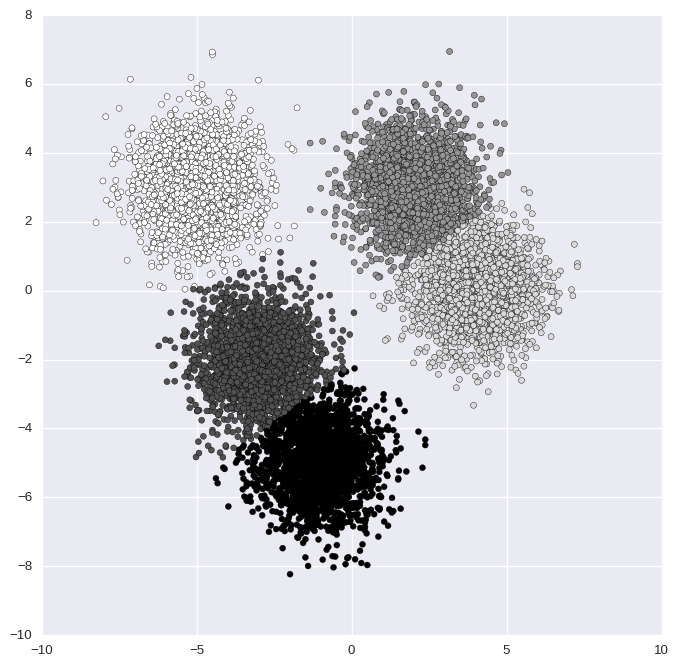

In [4]:
labels = y
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=5)
__ = bench_k_means(kmeans, name="k-means++", data=X)

# Extract cluster assignments for each data point.
labels = kmeans.labels_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=labels)

### Mean-shift

Number of estimated clusters: 3
The Silhouette Coefficient: 0.610


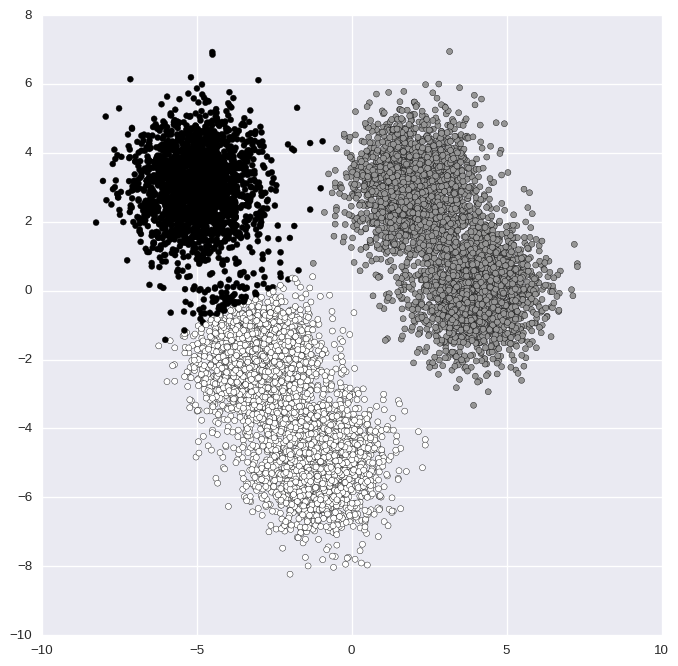

In [5]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
silhouette = metrics.silhouette_score(X, ms.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=labels)

### Spectral clustering

The Silhouette Coefficient: 0.561


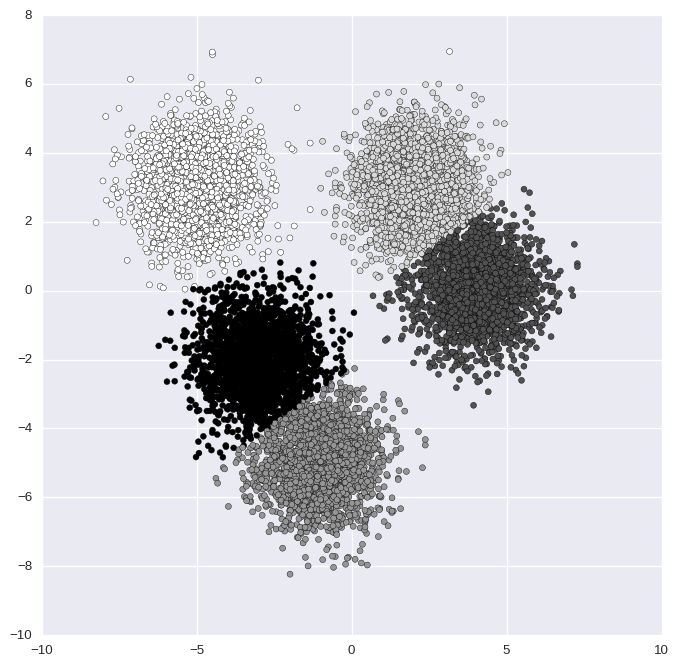

In [6]:
# We know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X)

# Predicted clusters.
predict = sc.fit_predict(X)

silhouette = metrics.silhouette_score(X, sc.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))

# Graph results.
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=predict)

### Affinity propagation

In [7]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_


print('Estimated number of clusters: {}'.format(n_clusters_))
silhouette = metrics.silhouette_score(X, af.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))
vmeas = metrics.v_measure_score(y, af.labels_)
print("Validity Measure: {:.3f}".format(vmeas))

Done
Estimated number of clusters: 1719
The Silhouette Coefficient: 0.131
Validity Measure: 0.409


## 2 - Three Clusters Far Apart from each other :


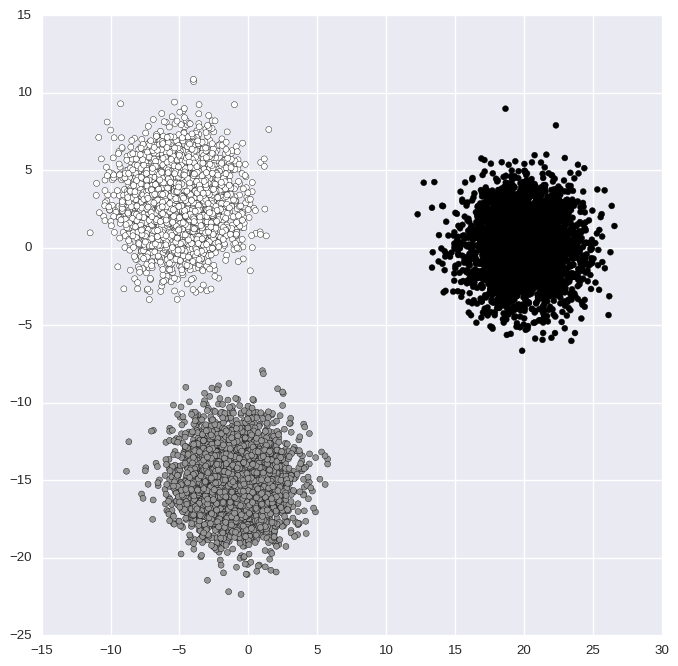

In [10]:
# The coordinates of the centers of our blobs.
centers = [[-5, 3], [-1, -15], [20, 0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=2,
    n_features=8,
    random_state=42)

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=y)

### K-Means

_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.04s  80345      1.000  1.000   1.000   1.000   0.824
_______________________________________________________________________________
Number of estimated clusters: 3


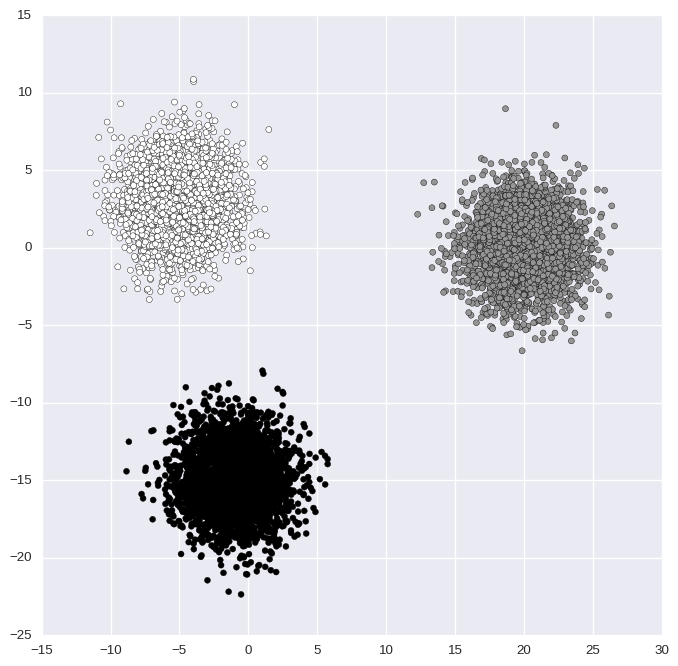

In [12]:
labels = y
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=3)
__ = bench_k_means(kmeans, name="k-means++", data=X)

# Extract cluster assignments for each data point.
labels = kmeans.labels_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=labels)

### Mean-shift

Number of estimated clusters: 3
The Silhouette Coefficient: 0.824


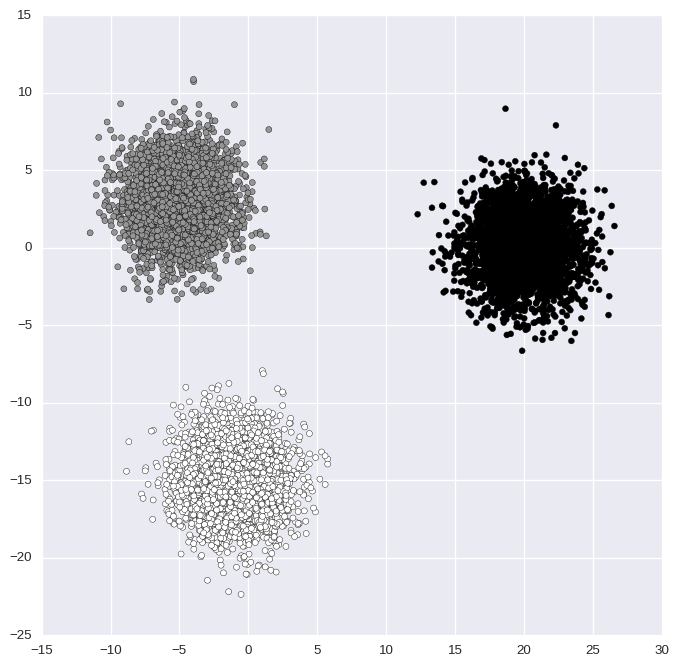

In [13]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
silhouette = metrics.silhouette_score(X, ms.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=labels)

### Spectral clustering

The Silhouette Coefficient: 0.708


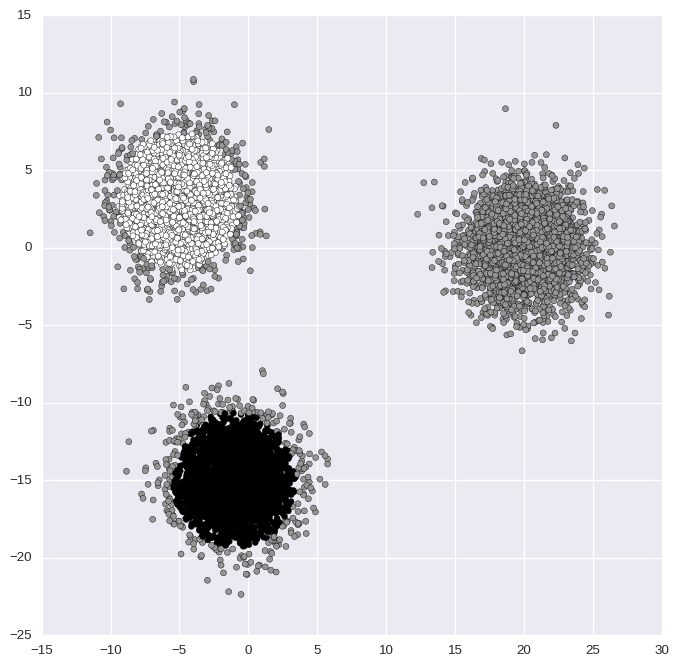

In [14]:
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X)

# Predicted clusters.
predict = sc.fit_predict(X)

silhouette = metrics.silhouette_score(X, sc.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))

# Graph results.
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=predict)

### Affinity propagation

In [15]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_


print('Estimated number of clusters: {}'.format(n_clusters_))
silhouette = metrics.silhouette_score(X, af.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))
vmeas = metrics.v_measure_score(y, af.labels_)
print("Validity Measure: {:.3f}".format(vmeas))

Done
Estimated number of clusters: 4522
The Silhouette Coefficient: 0.070
Validity Measure: 0.274


## 3 - Two Circles near each other :

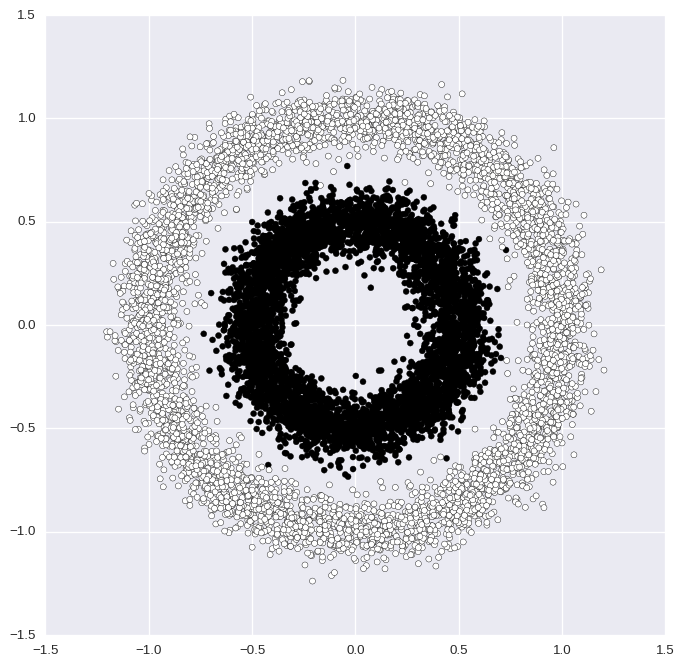

In [20]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=10000, factor=.5, noise=.08)

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=y)

### K-Means

_______________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI   silhouette
k-means++    0.02s  4071      0.000  0.000   0.000  -0.000   0.345
_______________________________________________________________________________
Number of estimated clusters: 2


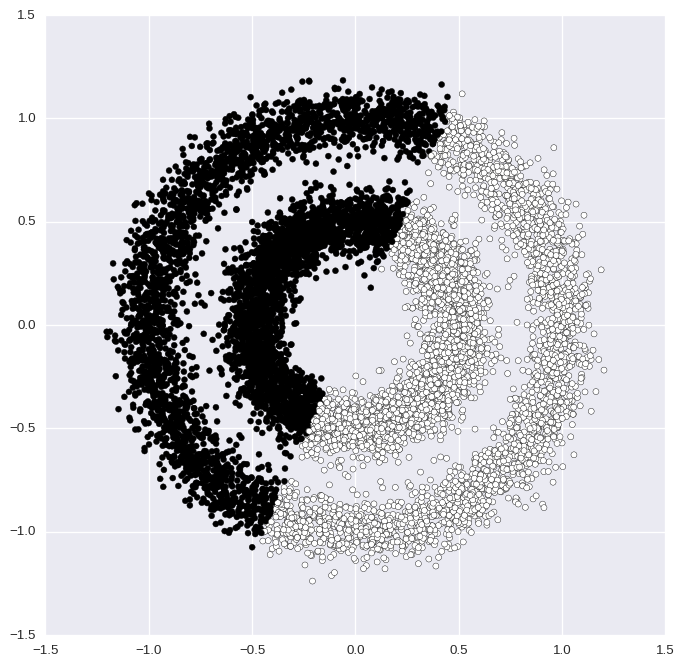

In [22]:
labels = y
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=2)
__ = bench_k_means(kmeans, name="k-means++", data=X)

# Extract cluster assignments for each data point.
labels = kmeans.labels_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=labels)

### Mean-shift

Number of estimated clusters: 4
The Silhouette Coefficient: 0.372


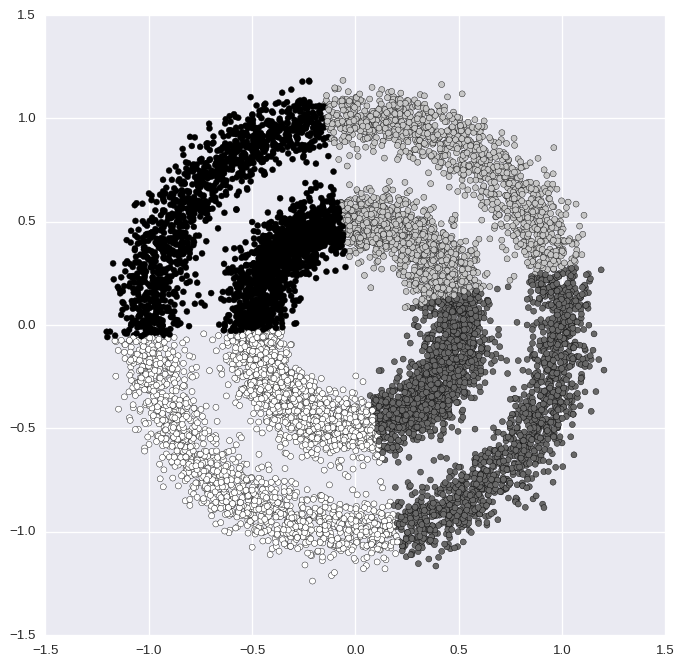

In [23]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
silhouette = metrics.silhouette_score(X, ms.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=labels)

### Spectral clustering

The Silhouette Coefficient: 0.350


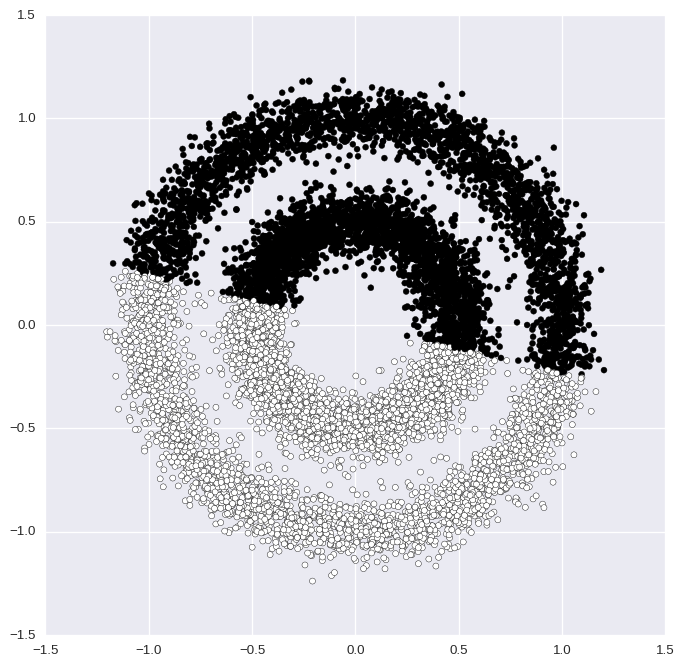

In [25]:
# We know we're looking for three clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X)

# Predicted clusters.
predict = sc.fit_predict(X)

silhouette = metrics.silhouette_score(X, sc.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))

# Graph results.
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=predict)

### Affinity propagation

In [26]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_


print('Estimated number of clusters: {}'.format(n_clusters_))
silhouette = metrics.silhouette_score(X, af.labels_, metric='euclidean')
print("The Silhouette Coefficient: {:.3f}".format(silhouette))
vmeas = metrics.v_measure_score(y, af.labels_)
print("Validity Measure: {:.3f}".format(vmeas))

Done
Estimated number of clusters: 3984
The Silhouette Coefficient: 0.097
Validity Measure: 0.179


##  Discussion

In [31]:
# Create results table to make model comparisons easier 
# K-Means Table
table1_dict = {'Actual Clusters' : [5, 3, 2],
               'Estimated Clusters' : [5, 3, 2],
               'Silhouette Coefficient' : [0.560, 0.824, 0.345]}

table_index = ['5 Close Clusters', '3 Cluster Far Apart', '2 Close Circle Clusters']
k_means_table_df = pd.DataFrame(table1_dict, index=table_index)

# Mean-Shift Table
table2_dict = {'Actual Clusters' : [5, 3, 2],
               'Estimated Clusters' : [3, 3, 4],
               'Silhouette Coefficient' : [0.610, 0.824, 0.372]}

meanshift_table_df = pd.DataFrame(table2_dict, index=table_index)

# Spectral Clustering Table
table3_dict = {'Actual Clusters' : [5, 3, 2],
               'Estimated Clusters' : [5, 3, 2],
               'Silhouette Coefficient' : [0.560, 0.708, 0.350]}

spectral_table_df = pd.DataFrame(table3_dict, index=table_index)

# Affinity Clustering Table
table4_dict = {'Actual Clusters' : [5, 3, 2],
               'Estimated Clusters' : [1719, 4522, 3984],
               'Silhouette Coefficient' : [0.131, 0.070, 0.097]}

affinity_table_df = pd.DataFrame(table4_dict, index=table_index)

print('K-Means Results')
display(k_means_table_df)

print('\nMean-Shift Results')
display(meanshift_table_df)

print('\nSpectral Results')
display(spectral_table_df)

print('\nAffinity Results')
display(affinity_table_df)

K-Means Results


,Actual Clusters,Estimated Clusters,Silhouette Coefficient
5 Close Clusters,5,5,0.560
3 Cluster Far Apart,3,3,0.824
2 Close Circle Clusters,2,2,0.345



Mean-Shift Results


,Actual Clusters,Estimated Clusters,Silhouette Coefficient
5 Close Clusters,5,3,0.610
3 Cluster Far Apart,3,3,0.824
2 Close Circle Clusters,2,4,0.372



Spectral Results


,Actual Clusters,Estimated Clusters,Silhouette Coefficient
5 Close Clusters,5,5,0.560
3 Cluster Far Apart,3,3,0.708
2 Close Circle Clusters,2,2,0.350



Affinity Results


,Actual Clusters,Estimated Clusters,Silhouette Coefficient
5 Close Clusters,5,1719,0.131
3 Cluster Far Apart,3,4522,0.070
2 Close Circle Clusters,2,3984,0.097


Affinity propagation had the lowest Silhouette coefficient scores and took the longest to run.  In addition, it always greatly over estimated the number of clusters.   The Spectral Clustering algorithm performed slightly better.  Its job on the two ring clusters is mis leading. Its labeling of the clusters cut both groups in half and not along the contours of the cluster boundaries.  

The Mean-Shift algorithm performed better than the Spectral and Affinity algorithms especially considering that it no prior knowledge to the number of clusters in the dataset.   It had higher coefficient values than the K-Means algorithm. Interestingly it had a slightly higher Silhouette coefficient value than K-Means for the donut clusters considering than it over estimated the number of clusters. It would appear that he Mean-Shift algorithm is a better jack of trades algorithm because it needs no knowledge of the number of clusters in the data to run.